<a href="https://colab.research.google.com/github/nkorzounUD/DSPS_NKorzoun/blob/main/HW7/ClusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Needed scipy upgrade for dendrogram
!pip install -U scikit-learn

     |████████████████████████████████| 23.2 MB 975 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

%pylab inline

# Define default font size to be 18 for readability
pl.rcParams['font.size'] = 18

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [ ]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW7/kidpackgenes.csv")

# 1. explore the data. 

In [ ]:
genes

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
genes = genes.dropna(axis=0)

In [ ]:
genes

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
genes.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,1301.500000,-0.074219,-0.004992,0.005083,-0.079159,-0.042852,0.015122,-0.059658,-0.039993,-0.088130,0.000743,-0.041528,-0.015251,-0.034757,-0.112920,-0.048207,-0.012697,-0.002441,-0.023402,-0.009031,-0.043262,-0.010685,-0.046829,-0.017217,-0.018598,-0.064104,-0.019154,-0.013590,-0.050083,-0.005277,-0.012565,-0.020906,0.000761,0.024507,-0.113173,-0.029828,-0.061770,-0.013789,-0.023064,-0.029895,-0.003806,-0.054352,-0.002723,-0.039034,-0.017288,-0.030980,-0.004383,-0.053051,-0.068682,-0.009360,-0.075672,-0.093618,-0.033892,-0.112174,-0.074965,-0.014106,-0.071248,0.035666,-0.008715,-0.017194,-0.200595,-0.037934,-0.015484,-0.019799,-0.031708,-0.038404,-0.032761,-0.001378,-0.022449,0.026098,-0.064188,-0.027919,0.007936,-0.114165,-0.010700
std,751.277024,0.494020,0.346403,0.331839,0.692958,0.428961,0.339459,0.379709,0.351300,0.455827,0.345465,0.362323,0.447244,0.540109,0.580689,0.496463,0.543407,0.465599,0.388044,0.397990,0.425980,0.403044,0.451923,0.428803,0.336798,0.462792,0.488627,0.407588,0.467046,0.371725,0.383642,0.406435,0.441833,0.378632,0.629972,0.416798,0.493904,0.443052,0.431308,0.421408,0.532214,0.398046,0.461719,0.483934,0.392557,0.403347,0.448873,0.492421,0.461677,0.386885,0.410835,0.560112,0.405502,0.514117,0.544044,0.397607,0.357038,0.409143,0.434971,0.381831,0.653300,0.359162,0.346666,0.425046,0.428582,0.484102,0.405609,0.317786,0.353947,0.395140,0.397782,0.457248,0.493876,0.533757,0.335695
min,1.000000,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.720292,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.929382,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.342742,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.356298,-3.115594,-3.055898,-2.517066,-3.152997,-2.251476,-3.860232,-2.786184,-2.578267,-2.972079,-2.115559,-2.544261,-3.074444,-2.650749,-2.215245,-2.421503,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.013660,-2.955538,-2.909000,-1.563549
25%,651.250000,-0.378972,-0.212770,-0.179147,-0.506662,-0.276024,-0.144611,-0.309549,-0.234297,-0.332846,-0.210783,-0.261752,-0.280335,-0.321751,-0.392277,-0.350688,-0.324134,-0.252941,-0.238955,-0.231085,-0.293276,-0.216709,-0.316509,-0.260370,-0.224494,-0.316412,-0.285549,-0.246799,-0.343867,-0.203991,-0.234622,-0.254897,-0.243294,-0.138720,-0.494179,-0.292053,-0.339179,-0.277470,-0.293535,-0.261606,-0.314649,-0.284501,-0.278219,-0.345054,-0.203879,-0.272156,-0.286396,-0.351555,-0.325736,-0.191825,-0.297874,-0.431941,-0.271377,-0.418970,-0.391202,-0.261430,-0.272787,-0.167300,-0.298374,-0.221744,-0.596937,-0.229019,-0.194918,-0.265233,-0.282190,-0.321877,-0.277627,-0.170285,

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [ ]:
scaledgenes = pd.DataFrame(skl.preprocessing.scale(genes))
scaledgenes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,-1.731385,-0.146019,-1.488856,0.514638,-0.353014,0.502572,0.029563,0.222502,0.604333,0.647998,0.075182,1.136687,0.907956,-0.127309,0.367495,-0.660243,0.534738,-0.276161,0.034742,-0.980446,-0.197406,0.609548,1.494984,0.115342,-0.097776,0.834808,1.425107,1.571905,-0.054503,0.299091,0.348216,1.390682,0.284985,0.501318,0.856694,-0.853848,0.161556,0.950363,-0.353100,-0.008300,-0.099195,1.091593,0.541688,-0.251869,0.967078,0.549274,0.234840,2.707725,-0.148490,0.059847,0.877376,0.023328,0.275269,0.358016,-0.277437,-0.337881,-0.092524,0.956724,0.783125,0.484408,-0.576192,0.126103,0.037952,0.444157,-0.211445,0.576660,-0.776721,-0.001318,-0.672957,0.202170,0.440209,0.045815,1.098020,0.436797,1.006906
1,-1.730054,-0.792728,0.464332,0.666898,-0.676048,0.195739,0.359141,0.427133,0.016276,1.292408,0.013869,1.202594,1.095210,0.055175,1.621696,-0.827387,0.027786,-0.505117,-0.289729,-1.158889,0.309853,-0.070339,1.428788,0.544404,-0.201160,1.240637,1.555996,2.044202,-0.508714,0.695053,-0.286004,0.170844,0.370791,0.487009,0.737470,-0.161089,0.446022,1.310643,-0.344948,0.516954,0.200795,1.657301,-0.017265,0.381959,1.143808,1.090641,0.120314,1.881579,-0.815878,0.153995,0.433791,-0.615950,0.081879,-0.234432,-1.120606,-0.312187,-0.542851,0.002609,1.110759,0.298254,-0.722362,0.043553,0.318469,-0.242917,-0.819484,0.846758,-1.021731,-0.420254,-0.644995,0.350828,0.073335,0.608766,0.923101,-0.749670,0.630622
2,-1.728723,-0.029854,-0.586855,-0.470565,-0.301764,-0.892364,0.311979,-0.100687,0.092237,0.916678,-0.646321,0.398565,0.209992,-0.259801,0.305572,-0.394290,-0.043692,-1.747101,-0.182220,-1.954691,-1.065694,-0.498056,0.655872,0.497126,-0.348993,-0.032556,0.983376,0.692545,0.268341,1.218127,-0.958493,-0.263409,-1.167418,0.474370,-0.031375,-1.650354,-1.340592,0.010389,-0.007276,-0.945628,-0.449924,0.179561,0.437077,0.774829,-0.135723,0.812693,-0.318086,1.081257,-0.815935,0.472055,0.667890,0.012390,-0.314736,0.303127,-0.074875,-0.016122,0.099233,0.208290,1.111159,0.205389,-1.414642,0.343176,-0.418678,-0.480002,0.389655,0.048375,-1.049329,-0.155712,-0.412715,0.133189,0.080352,-0.194740,-0.420867,-0.565212,-0.063473
3,-1.727391,-0.513189,-4.937272,0.191776,-0.128601,-0.999641,0.777537,-0.002835,-0.519828,1.637398,0.373869,1.581952,-0.210795,-0.266839,0.206770,-0.590421,-1.084528,-0.510219,0.852890,-0.642572,-0.144977,1.484118,0.590947,-0.848305,0.273840,0.316052,1.173312,0.770137,1.133725,0.310780,0.191313,0.250755,-0.376692,-0.929355,1.041450,-0.056358,-0.780719,1.613721,0.709560,0.717453,-0.226552,-0.092706,0.268279,-0.108837,0.489395,0.889698,2.291933,1.064483,0.337610,1.054762,0.053428,0.800454,0.168110,1.550840,0.715554,0.490909,-0.566964,0.485855,0.172965,0.319175,-0.046334,0.313694,0.235179,0.696623,-0.700702,0.397035,-0.265448,-0.371819,-0.755718,2.324671,-0.197438,-2.388543,-0.452573,0.862189,0.200050
4,-1.726060,-0.036661,-1.892565,0.213591,-0.818882,-0.007659,-0.074920,1.127750,-0.010928,-0.511103,0.335597,1.069383,0.665961,-0.079383,1.617300,-0.177465,-1.240288,-1.242240,0.156628,-0.245946,0.562178,0.526957,0.502980,0.161776,0.052103,0.468239,0.787042,1.167348,-0.225869,0.657280,-0.569612,1.601774,0.044756,0.101760,-1.378444,-0.602369,-0.207398,1.942259,-0.873132,0.878144,0.091284,0.975895,0.076618,1.044569,-0.257918,1.727517,0.998650,1.071057,-0.609384,0.283784,-0.462979,-0.427668,2.338521,0.045657,-0.703241,-0.081914,0.678818,0.224309,1.132434,1.636439,-1.854763,-0.679603,0.278083,2.058854,-1.064301,0.011097,1.052555,0.550454,-0.487088,0.311425,-0.083219,-0.569324,-1.012305,-1.139229,0.197174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
scaledgenes.shape

(2602, 75)

In [ ]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(0    -0.0
 1    -0.0
 2     0.0
 3    -0.0
 4     0.0
      ... 
 70   -0.0
 71   -0.0
 72    0.0
 73   -0.0
 74    0.0
 Length: 75, dtype: float64, 0     1.000192
 1     1.000192
 2     1.000192
 3     1.000192
 4     1.000192
         ...   
 70    1.000192
 71    1.000192
 72    1.000192
 73    1.000192
 74    1.000192
 Length: 75, dtype: float64)

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
tsne = skl.manifold.TSNE(n_components=2, perplexity=30, verbose=1, 
                         random_state=111)

In [ ]:
tsne_results = tsne.fit_transform(scaledgenes)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2602 samples in 0.001s...
[t-SNE] Computed neighbors for 2602 samples in 0.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2602
[t-SNE] Computed conditional probabilities for sample 2000 / 2602
[t-SNE] Computed conditional probabilities for sample 2602 / 2602
[t-SNE] Mean sigma: 2.001062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.091782
[t-SNE] KL divergence after 1000 iterations: 1.981887


*2.3* plot the TSNE projection


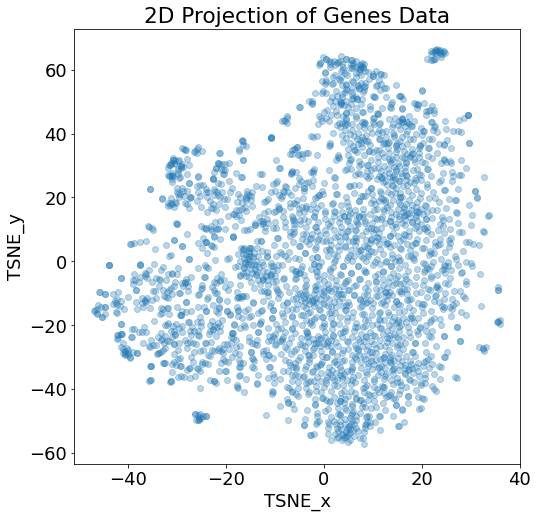

In [ ]:
x=tsne_results[:,0]
y=tsne_results[:,1]
pl.figure(figsize=(8, 8))
pl.scatter(x, y, alpha=0.3)

# Add labels even though they mean nothing physically
pl.xlabel("TSNE_x")
pl.ylabel("TSNE_y")
pl.title("2D Projection of Genes Data")

pl.show()


## **Figure 1:** 2D projection of dataset with 75 dimensions where each dimension contains 2602 data points. This projection was made with a T-distributed Stochastic Neighbor Embedding (TSNE) from the `sklearn` package. There is some structure to the data which can be seenfrom the small groupings of higher density, indicated by a darker blue hue in that region. There also appear to be some "islands" of data which is offset from the main distribution. The two most noticeable islands occur in the upper right (at about one o'clock) and in the lower left (at about seven o'clock).

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [ ]:
def calICVar(points, labels, centers):
  '''Calculates the total intracluster variance.

  Parameters:
  points  -- data points for which to calculate the intracluster variance  
  labels  -- cluster labels of data points output from k-means algorithm  
  centers -- centers of clusters output from k-means algorithm  

  Returns:
  The sum of the variances for each cluster
  '''

  variances = []
  clusters = np.amax(labels) + 1
  for i in range(clusters):
    sum = 0
    for j in range(len(points)):
      for k in range(75):
        if(i == labels[j]):
          sum += (abs(points.iloc[j][k]-centers[i][k]))**2
    variances.append(sum)
  print(variances)
  return np.sum(variances)


# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

In [ ]:
nClust = 10
Nvals = []
ICVvals = []

for i in range(nClust):
  Nvals.append(i+1)
  geneclustersKM = cluster.KMeans(n_clusters=(i+1),
                                  random_state=111).fit(scaledgenes)
  ICV = calICVar(scaledgenes, geneclustersKM.labels_, 
                 geneclustersKM.cluster_centers_)
  ICVvals.append(ICV)


[195150.00000000207]
[104001.14423555136, 52764.10334891812]
[70731.31571126755, 51912.018548332795, 20755.52710313902]
[47679.967261094505, 28294.068861435055, 40801.51315757071, 19653.794962981556]
[38394.05539799387, 23698.436734226467, 16723.42602353638, 41059.74590594821, 10255.303095083156]
[21971.61771917262, 10281.38279732927, 18681.531186076623, 36523.15127263209, 10348.637766702503, 27890.421319328005]
[15571.34624819893, 18841.065285151013, 24576.97053093438, 8272.950460877692, 9916.975956033248, 18195.840998075073, 26996.93469479156]
[15987.31463387403, 22745.201545140833, 22321.088932655828, 12520.0032961788, 8269.832036475782, 8791.358557171525, 15189.104357004635, 14373.877848163496]
[20535.972416105826, 5666.144556364387, 4614.407357825135, 12238.874450171441, 14415.955615193818, 21448.878169633004, 13793.346718213683, 16783.62902826943, 8791.358557171525]
[21368.52017054318, 7361.460665628949, 10489.80494162635, 15255.60140220674, 6641.483009636271, 10934.879563011173,

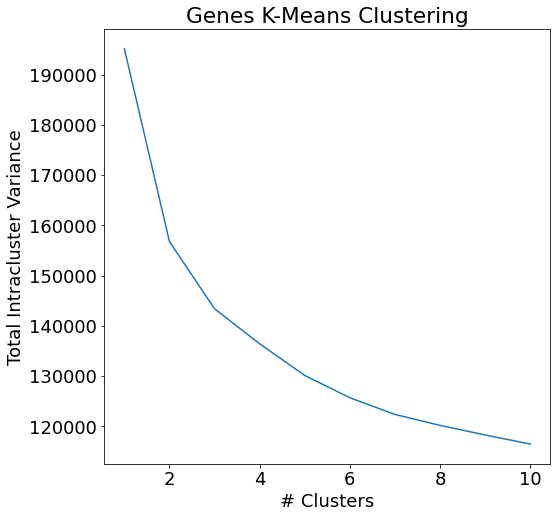

In [ ]:
pl.figure(figsize=(8, 8))
pl.plot(Nvals, ICVvals)
pl.xlabel("# Clusters")
pl.ylabel("Total Intracluster Variance")
pl.title("Genes K-Means Clustering")

pl.show()

## **Figure 2:** This plot shows the total intracluster variance of all clusters plotted as a function of the number of total clusters used in the k-means clustering algorithm. There are two clearly visible knees, one occurs when the number of clusters equals two and the other when the number of clusters equals three. Three clusters was chosen as the optimal number of clusters because past this point the total intracluster variance does not decrease with a large gradient (i.e. this is where the elbow occurs).

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

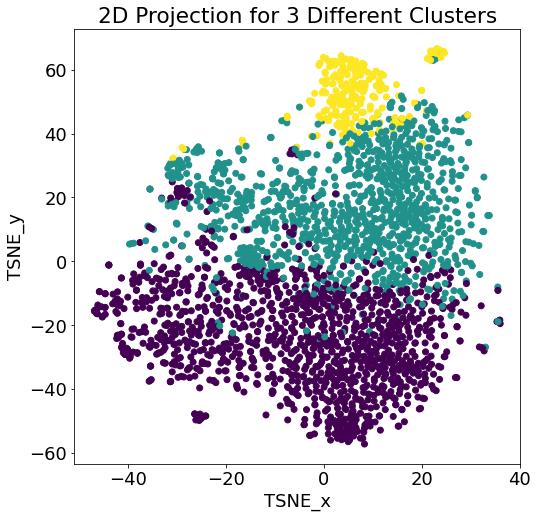

In [ ]:
geneclustersKM = cluster.KMeans(n_clusters=3,
                                random_state=111).fit(scaledgenes)
pl.figure(figsize=(8, 8))
pl.scatter(tsne_results[:,0], tsne_results[:,1], c=geneclustersKM.labels_ / 
           geneclustersKM.n_clusters)

pl.xlabel("TSNE_x")
pl.ylabel("TSNE_y")
pl.title("2D Projection for 3 Different Clusters")

pl.show()

## **Figure 3:** Same 2D projection of the data shown in Figure 1 except now the data is organized into three separate clusters. Each color represents a different cluster.


# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

In [ ]:
# Calculate Euclidean distance between two points
def distance(p1, p2):
  '''Calculates the Euclidean distance between two points, p1 and p2
  
  Args:
    p1: point 1
    p2: point 2

  Returns:
    The euclidean distance between p1 and p2
  '''

  return np.sqrt(np.sum(np.square(p1 - p2)))


In [ ]:
# Create distance matrix
distMatrix = np.zeros((len(scaledgenes),len(scaledgenes)))
for i in range(len(scaledgenes)):
    # Stop when j=i. Diagonal is intialized to 0 already, 
    # and we know matrix will be symmetric
    for j in range(i):
        distMatrix[i][j] = distance(scaledgenes.iloc[i],scaledgenes.iloc[j])
        # We know matrix will be symmetric - cut down on computation time
        distMatrix[j][i] = distMatrix[i][j]


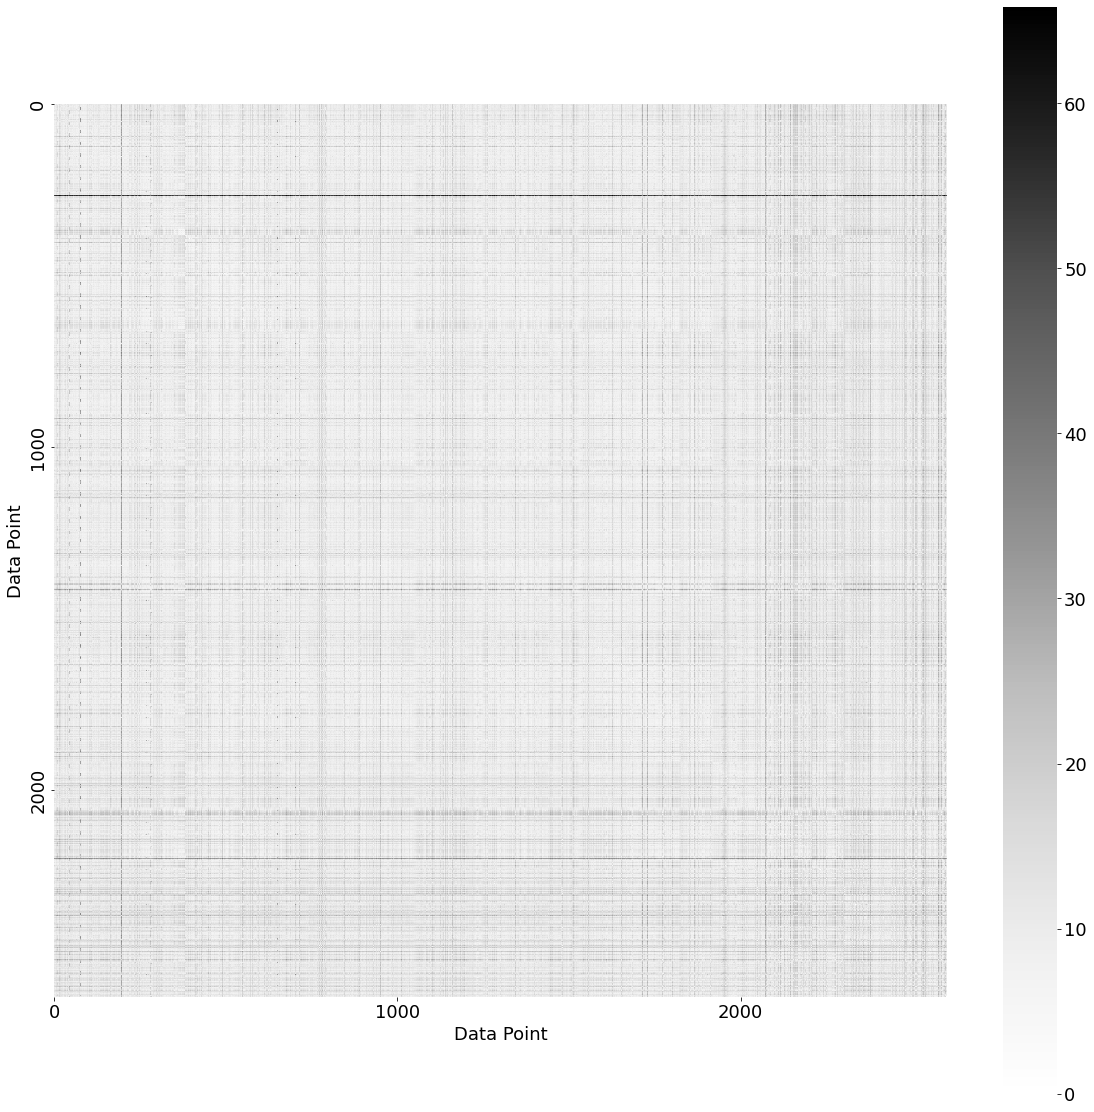

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(distMatrix,cmap='Greys',xticklabels=1000,yticklabels=1000,
                  square=True)

ax.set_xlabel("Data Point")
ax.set_ylabel("Data Point");

## **Figure 4:** Pairwise distance matrix for all 2602 data points. No clear structure. Visible artifacting from upscaling small square boxes.



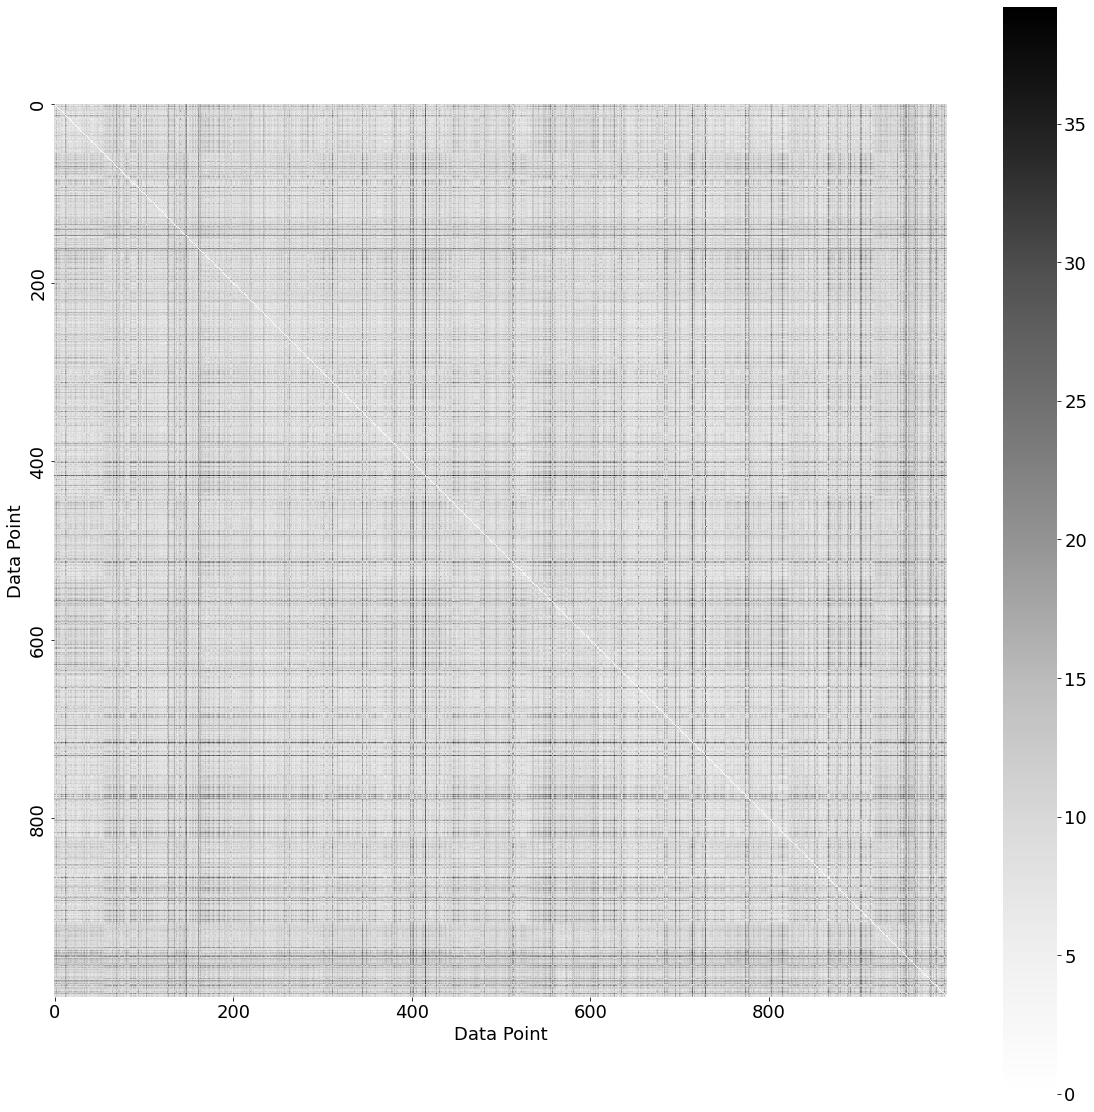

In [ ]:
# Plot a subset because looking at an array this big is stupid
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(distMatrix[1000:2000,1000:2000],cmap='Greys',xticklabels=200,
                 yticklabels=200,square=True)

ax.set_xlabel("Data Point")
ax.set_ylabel("Data Point");

## **Figure 5:** Pairwise distance matrix for datapoints 1000-2000. Some structure visible - a diagonal line all with the same value: 0. Artifacting still apparant.



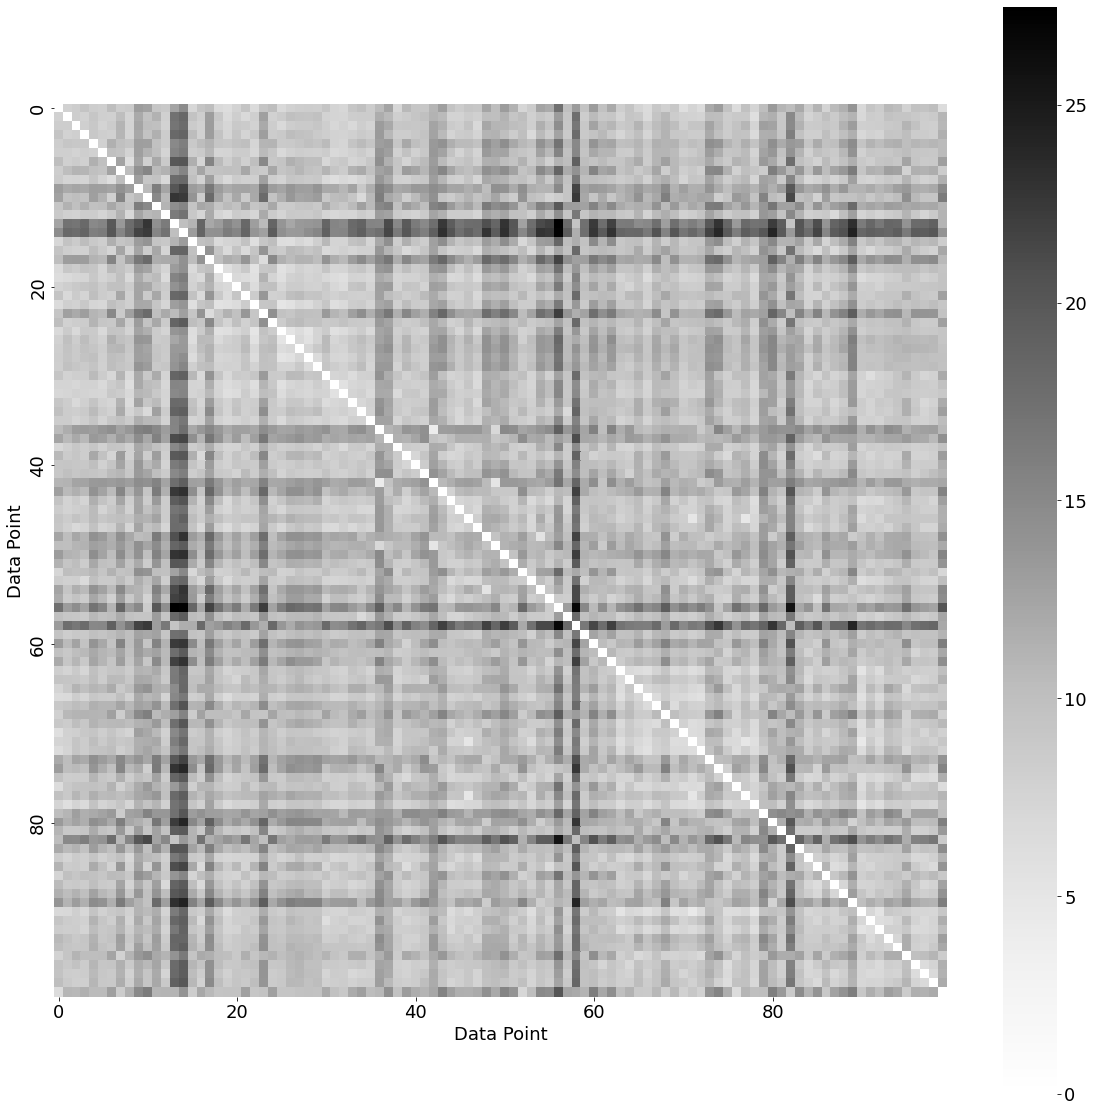

In [ ]:
# And again with less data points
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(distMatrix[1500:1600,1500:1600],cmap='Greys',xticklabels=20,
                 yticklabels=20,square=True)

ax.set_xlabel("Data Point")
ax.set_ylabel("Data Point");

## **Figure 6:** Pairwise distance matrix for points 1500-1600. Structure is more clearly visible. The matrix is symmetric about the diagonal. The diagonal values are all the same - 0.



4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

mean: 11.6


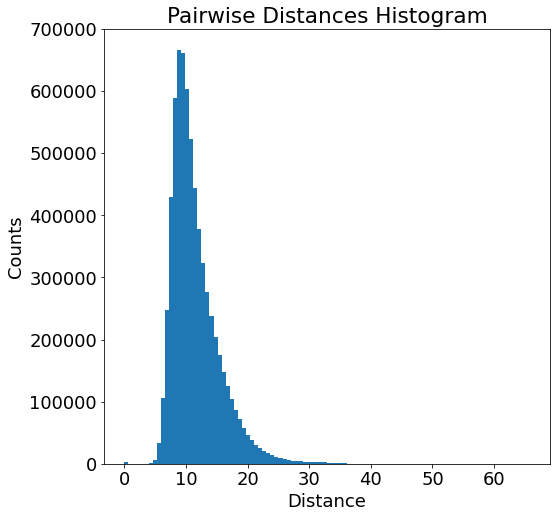

In [ ]:
distances = distMatrix.flatten()
plt.figure(figsize=(8, 8))
plt.hist(distances, bins=100)
plt.title("Pairwise Distances Histogram")
plt.xlabel("Distance")
plt.ylabel("Counts");

print("mean: {0:.1f}".format(np.mean(distances)))

## **Figure 7:** Histogram of the frequency of values in the entirety of the pairwise distances matrix with 100 bins. The mean value is 11.6. There is a grouping of datapoints at the bin with low edge equal to 0, corresponding to the distances of each point with itself.



## **Mean is about 11.6, choose to initialize DBSCAN at 10**

## **Min samples is atleast number of dimensions +1, so choose 75+1=76**


4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 


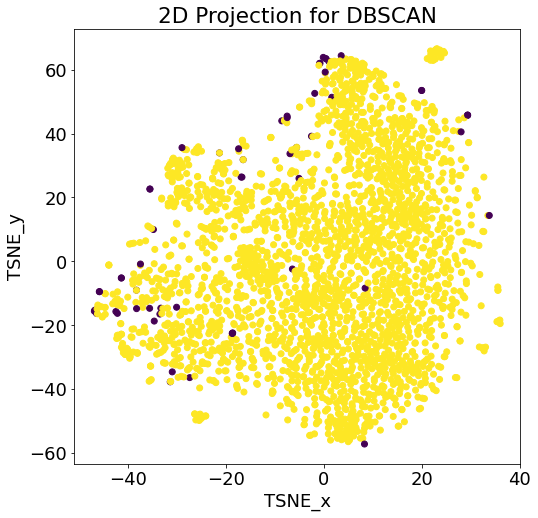

In [ ]:
geneclustersDBSCAN = cluster.DBSCAN(eps=10,min_samples=76,
                                    metric='euclidean').fit(scaledgenes)

pl.figure(figsize=(8, 8))
pl.scatter(tsne_results[:,0], tsne_results[:,1], c=geneclustersDBSCAN.labels_)

pl.xlabel("TSNE_x")
pl.ylabel("TSNE_y")
pl.title("2D Projection for DBSCAN")

pl.show()

## **Figure 8:** TSNE projection after performing the DBSCAN. A majority of points were clustered together with 59 outliers.



4a.4 How many clusters do you have, how many outliers? is that a significant number?

## **DBSCAN puts every point into 1 cluster, and separates outliers. Here there are 59 outliers. Out of 2602 datapoints, this is not significant**

In [ ]:
n_outliers = sum(geneclustersDBSCAN.labels_[i] == -1 
                 for i in range(len(geneclustersDBSCAN.labels_)));
print(f"number of outliers: {n_outliers:.2f}")

number of outliers: 59.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


In [ ]:
wardClust = cluster.AgglomerativeClustering(distance_threshold=None,
                                            n_clusters=3, linkage='ward',
                                            compute_distances=True).fit(
                                                scaledgenes)

4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


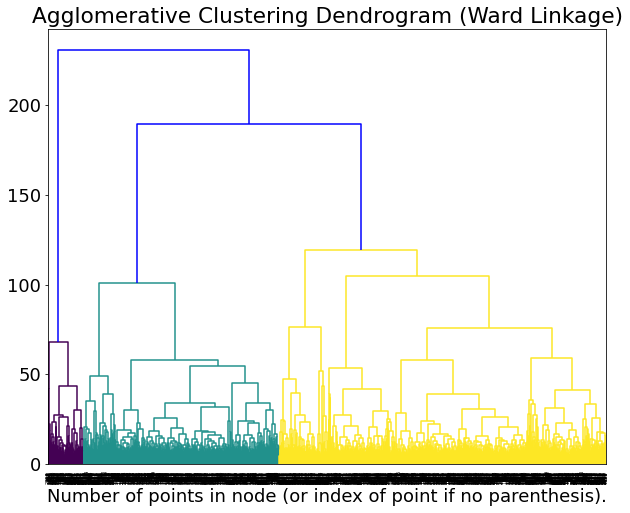

In [ ]:
def plot_dendrogram(model, **kwargs):
  '''Create linkage matrix and then plot the dendrogram.

  Parameters:
  model -- name of the dataset to make the dendogram for  

  Returns:
  Only the plot will return from the function but it is not
  given as a return value.
  '''

  # Create the counts of samples under each node
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]
  ).astype(float)

  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)


cmap = cm.viridis(np.linspace(0, 1, 3))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

pl.figure(figsize=(10, 8))
plt.title("Agglomerative Clustering Dendrogram (Ward Linkage)")
plot_dendrogram(wardClust, truncate_mode="level")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## **Figure 9:** Agglomerative clustering dendrogram of 2602 data points. Distance between nodes is calculated with the ward linkage, which minimizes the variance of the clusters being merged. The output dendogram plotted here is non-truncated.

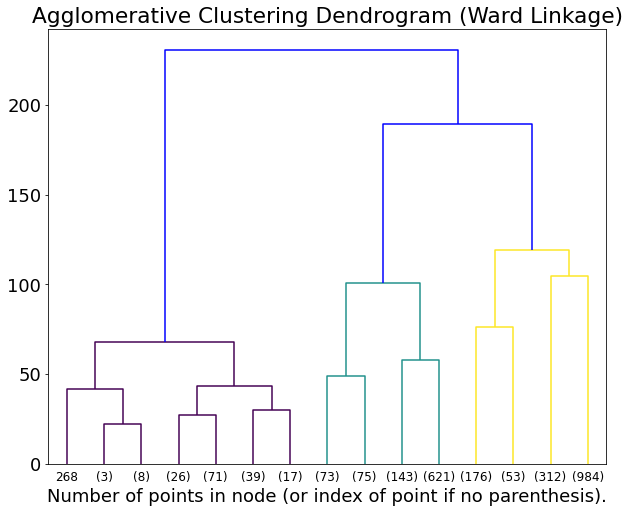

In [ ]:
# Here truncate dendrogram to three levels
p=3
cmap = cm.viridis(np.linspace(0, 1, 3))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

pl.figure(figsize=(10, 8))
plt.title("Agglomerative Clustering Dendrogram (Ward Linkage)")
plot_dendrogram(wardClust, truncate_mode="level", p=p)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## **Figure 10:** Same plot as Figure 9 (prev figure) but now the dendogram is truncated at three levels.

## **If we cut a band across the largest height difference between joined nodes (horizontal lines) , we can see that 3 clusters is ideal using agglomerative clustering.**

4b.3 repeat with a different linkage and comment on differences

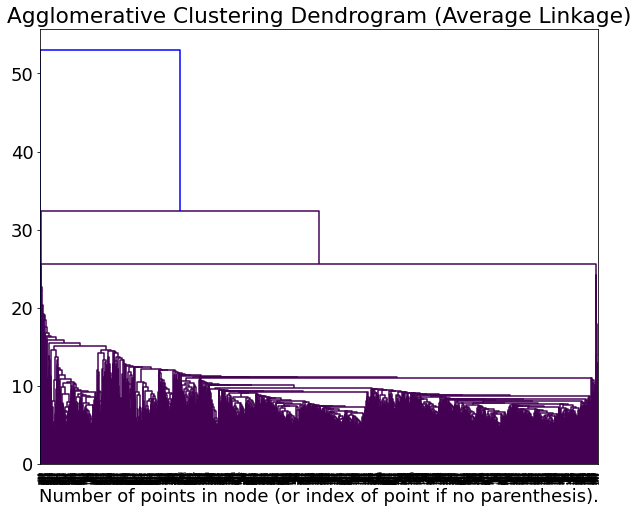

In [ ]:
wardClust = cluster.AgglomerativeClustering(distance_threshold=None,
                                            n_clusters=3, linkage='average',
                                            compute_distances=True).fit(
                                                scaledgenes)

p=3
cmap = cm.viridis(np.linspace(0, 1, 3))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

pl.figure(figsize=(10, 8))
plt.title("Agglomerative Clustering Dendrogram (Average Linkage)")
plot_dendrogram(wardClust)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## **Figure 11:** Agglomerative clustering dendrogram of 2602 data points. Distance between nodes is calculated with the average linkage, which uses the average distance of each observation between two sets. The output dendogram plotted here is non-truncated.

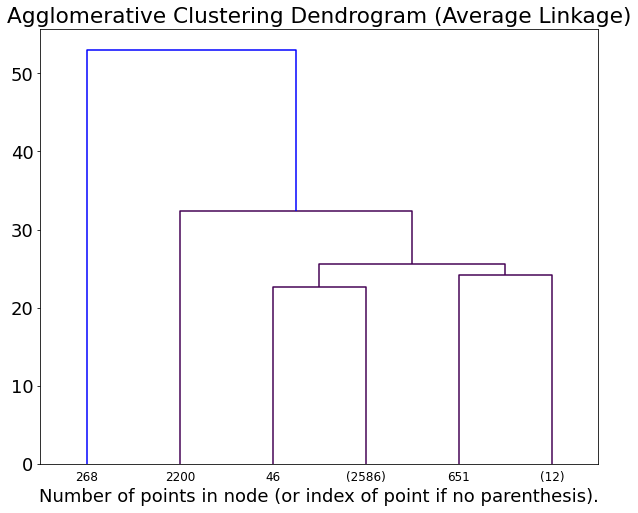

In [ ]:
# Here truncate dendrogram to three levels
p=3
cmap = cm.viridis(np.linspace(0, 1, 3))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

pl.figure(figsize=(10, 8))
plt.title("Agglomerative Clustering Dendrogram (Average Linkage)")
plot_dendrogram(wardClust, truncate_mode="level", p=p)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## **Figure 12:** Same plot as Figure 11 (prev figure) but now the dendogram is truncated at three levels.

## **Nodes are not grouped in an effective way using average linkage as opposed to ward linkage. There is one leaf with nearly every data point included within it, and the rest are only single data points. Therefore this dendrogram is not useful to determine the number of clusters using agglomerative clustering.**

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

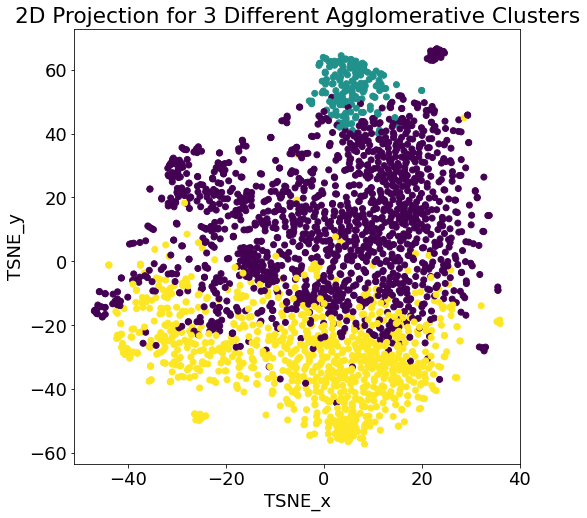

In [ ]:
wardClust = cluster.AgglomerativeClustering(distance_threshold=None,
                                            n_clusters=3, linkage='ward',
                                            compute_distances=True).fit(
                                                scaledgenes)

pl.figure(figsize=(8, 8))
pl.scatter(tsne_results[:,0], tsne_results[:,1], c=wardClust.labels_)
pl.xlabel("TSNE_x")
pl.ylabel("TSNE_y")
pl.title("2D Projection for 3 Different Agglomerative Clusters")

pl.show()


## **Figure 13:** Same 2D projection of the data shown in Figure 3 except now the data is organized into three separate clusters where each cluster is determined from the agglomerative clustering algorithm. Each color represents a different cluster. Note that cluster colors are not the same as that in Figure 3.

## **Most notably, the boundaries between clusters appear harder with this method than in the k-means algorithm.**